# **Project Name**    - Fitness Data EDA Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - DVSR Bharadwaj

# **Project Summary -**

This project involves exploratory data analysis (EDA) on a combined fitness dataset derived from multiple sources, including daily activity, calories, intensities, sleep, and weight logs. The dataset was merged in SQL Server and exported for analysis in Python. Key objectives include identifying patterns in user behavior, activity levels, sleep quality, and weight management. Through detailed visualizations and statistical summaries, we uncover insights such as correlations between steps and calories burned, the impact of activity intensity on overall health metrics, and trends in sleep efficiency. These findings aim to inform Bellabeat's marketing strategy by highlighting opportunities for product enhancements, user engagement features, and targeted campaigns focused on women's health and wellness.

# **GitHub Link -**

https://github.com/DVSRBharadwaj/Strava-App-Analysis

# **Problem Statement**


Analyze the merged fitness dataset to identify key trends in user activity, sleep patterns, and weight management. Provide actionable insights and unique visualizations to help Bellabeat refine its marketing strategy and product features for better user engagement and health outcomes.

#### **Define Your Business Objective?**

The primary business objective is to leverage EDA insights to enhance Bellabeat's smart device offerings, focusing on personalized health tracking for women. By understanding user behaviors and correlations in the data, we aim to recommend features that promote sustained activity, improved sleep, and effective weight management, ultimately driving user retention and market growth.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for clean output

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_excel('CombinedFitnessData.xlsx')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Id,CombinedDate,TotalSteps,TotalDistance,ActivityCalories,DailyCalories,IntensitySedentaryMinutes,IntensityLightlyActiveMinutes,IntensityFairlyActiveMinutes,IntensityVeryActiveMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport
0,1503960366,2016-04-12,13162,8.50,1985,1985,728,328,13,25,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,1797,1797,776,217,19,21,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,1776,1776,1218,181,11,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,1745,1745,726,209,34,29,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.16,1863,1863,773,221,10,36,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 943, Columns: 18


### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Id                             943 non-null    int64         
 1   CombinedDate                   943 non-null    datetime64[ns]
 2   TotalSteps                     943 non-null    int64         
 3   TotalDistance                  943 non-null    float64       
 4   ActivityCalories               943 non-null    int64         
 5   DailyCalories                  943 non-null    int64         
 6   IntensitySedentaryMinutes      943 non-null    int64         
 7   IntensityLightlyActiveMinutes  943 non-null    int64         
 8   IntensityFairlyActiveMinutes   943 non-null    int64         
 9   IntensityVeryActiveMinutes     943 non-null    int64         
 10  TotalSleepRecords              413 non-null    float64       
 11  TotalMinutesAsleep 

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 3


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print('Missing Values Count:\n', missing_values)

Missing Values Count:
 Id                                 0
CombinedDate                       0
TotalSteps                         0
TotalDistance                      0
ActivityCalories                   0
DailyCalories                      0
IntensitySedentaryMinutes          0
IntensityLightlyActiveMinutes      0
IntensityFairlyActiveMinutes       0
IntensityVeryActiveMinutes         0
TotalSleepRecords                530
TotalMinutesAsleep               530
TotalTimeInBed                   530
WeightKg                         876
WeightPounds                     876
Fat                              941
BMI                              876
IsManualReport                   876
dtype: int64


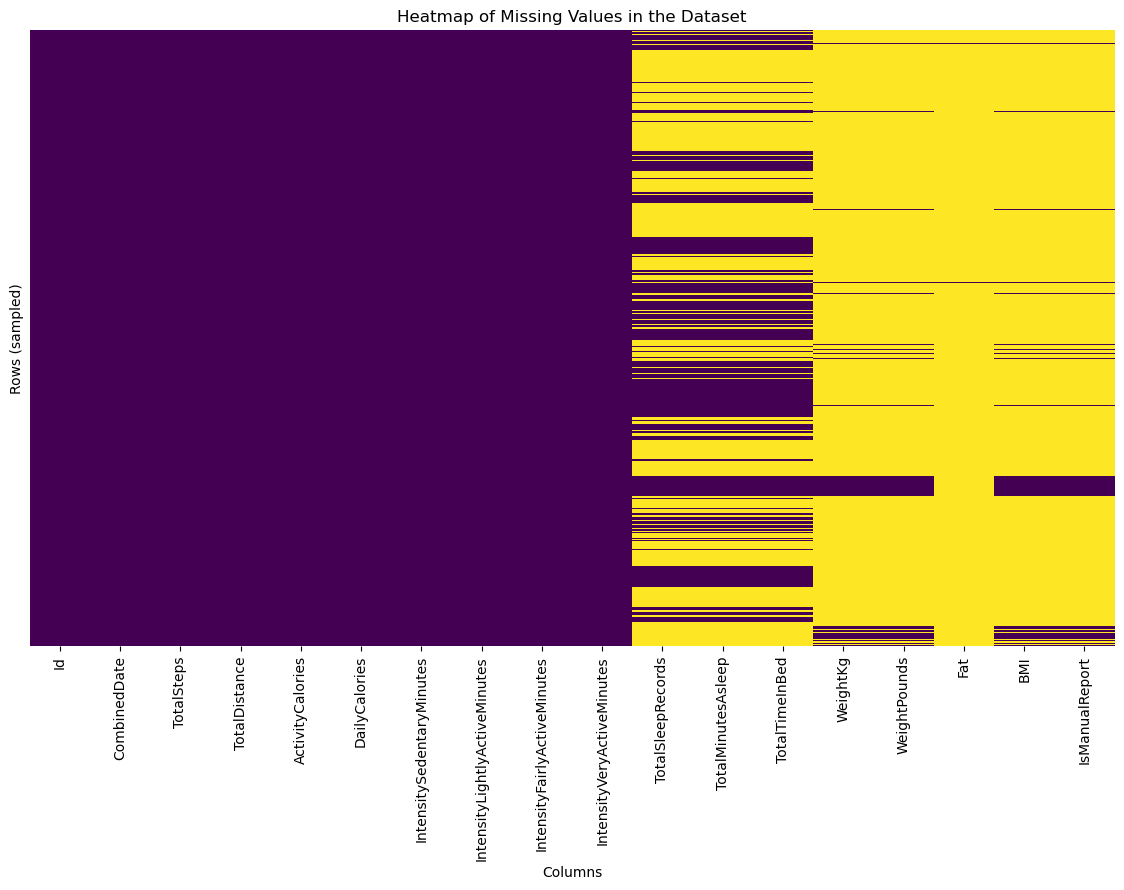

In [8]:
# Visualizing the missing values
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows (sampled)')
plt.show()

### What did you know about your dataset?

The dataset comprises 943 rows and 18 columns, capturing daily fitness metrics for multiple users over a period. It includes user IDs, dates, activity measures like steps and distance, calorie expenditure, intensity breakdowns, sleep records, and weight-related data. 

Notable observations: high missing values in sleep (e.g., TotalMinutesAsleep ~50% null) and weight columns (e.g., WeightKg ~90% null), suggesting inconsistent logging. No duplicates found, but data types require adjustment (e.g., CombinedDate to datetime). Numerical ranges show realistic values, with averages like ~7600 steps and ~2300 calories, indicating a moderately active user base.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print('Dataset Columns:\n', df.columns.tolist())

Dataset Columns:
 ['Id', 'CombinedDate', 'TotalSteps', 'TotalDistance', 'ActivityCalories', 'DailyCalories', 'IntensitySedentaryMinutes', 'IntensityLightlyActiveMinutes', 'IntensityFairlyActiveMinutes', 'IntensityVeryActiveMinutes', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport']


In [10]:
# Dataset Describe
df.describe(include='all')

,Id,CombinedDate,TotalSteps,TotalDistance,ActivityCalories,DailyCalories,IntensitySedentaryMinutes,IntensityLightlyActiveMinutes,IntensityFairlyActiveMinutes,IntensityVeryActiveMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,IsManualReport
count,9.430000e+02,943,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,413.000000,413.000000,413.000000,67.000000,67.000000,2.00000,67.000000,67.000000
mean,4.858486e+09,2016-04-26 07:21:18.897136896,7652.188759,5.502853,2307.507953,2307.507953,990.353128,193.025451,13.628844,21.239661,1.118644,419.467312,458.639225,72.035821,158.811803,23.50000,25.185224,0.611940
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,58.000000,61.000000,52.599998,115.963150,22.00000,21.450001,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3795.000000,2.620000,1829.500000,1829.500000,729.000000,127.000000,0.000000,0.000000,1.000000,361.000000,403.000000,61.400002,135.363831,22.75000,23.959999,0.000000
50%,4.445115e+09,2016-04-26 00:00:00,7439.000000,5.260000,2140.000000,2140.000000,1057.000000,199.000000,7.000000,4.000000,1.000000,433.000000,463.000000,62.500000,137.788910,23.50000,24.389999,1.000000
75%,6.962181e+09,2016-05-04 00:00:00,10734.000000,7.720000,2796.500000,2796.500000,1229.000000,264.000000,19.000000,32.000000,1.000000,490.000000,526.000000,85.049999,187.503159,24.25000,25.559999,1.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,4900.000000,4900.000000,1440.000000,518.000000,143.000000,210.000000,3.000000,796.000000,961.000000,133.500000,294.317108,25.00000,47.540001,1.000000
std,2.423712e+09,NaN,5086.532832,3.926509,720.815522,720.815522,301.262473,109.308468,20.000746,32.946264,0.345521,118.344679,127.101607,13.923206,30.695416,2.12132,3.066963,0.490986


### Variables Description 

- **Id**: Unique identifier for each user (integer, 33 unique values).
- **CombinedDate**: Date of the recorded activity (datetime, 31 unique dates from April to May 2016).
- **TotalSteps**: Number of steps taken in a day (float).
- **TotalDistance**: Distance covered in km (float).
- **ActivityCalories**: Calories burned from activities (float).
- **DailyCalories**: Total daily calories burned (float).
- **IntensitySedentaryMinutes**: Minutes spent sedentary (float).
- **IntensityLightlyActiveMinutes**: Light activity minutes (float).
- **IntensityFairlyActiveMinutes**: Fairly active minutes (float).
- **IntensityVeryActiveMinutes**: Very active minutes (float).
- **TotalSleepRecords**: Number of sleep sessions (float).
- **TotalMinutesAsleep**: Total sleep duration in minutes (float).
- **TotalTimeInBed**: Time spent in bed (float).
- **WeightKg**: Weight in kilograms (float).
- **WeightPounds**: Weight in pounds (float).
- **Fat**: Body fat percentage (float).
- **BMI**: Body Mass Index (float).
- **IsManualReport**: Flag for manual entry (float, 0 or 1).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in df.columns:
    unique_count = df[col].nunique()
    print(f'Variable: {col}, Unique Values Count: {unique_count}')
    if unique_count < 10:
        print(f'Unique Values: {df[col].unique()}')

Variable: Id, Unique Values Count: 33
Variable: CombinedDate, Unique Values Count: 31
Variable: TotalSteps, Unique Values Count: 842
Variable: TotalDistance, Unique Values Count: 615
Variable: ActivityCalories, Unique Values Count: 734
Variable: DailyCalories, Unique Values Count: 734
Variable: IntensitySedentaryMinutes, Unique Values Count: 549
Variable: IntensityLightlyActiveMinutes, Unique Values Count: 335
Variable: IntensityFairlyActiveMinutes, Unique Values Count: 81
Variable: IntensityVeryActiveMinutes, Unique Values Count: 122
Variable: TotalSleepRecords, Unique Values Count: 3
Unique Values: [ 1.  2. nan  3.]
Variable: TotalMinutesAsleep, Unique Values Count: 256
Variable: TotalTimeInBed, Unique Values Count: 242
Variable: WeightKg, Unique Values Count: 34
Variable: WeightPounds, Unique Values Count: 34
Variable: Fat, Unique Values Count: 2
Unique Values: [nan 22. 25.]
Variable: BMI, Unique Values Count: 36
Variable: IsManualReport, Unique Values Count: 2
Unique Values: [nan  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Convert CombinedDate to datetime if not already
df['CombinedDate'] = pd.to_datetime(df['CombinedDate'], errors='coerce')

In [13]:
# Fill missing values with 0 for numeric columns, as nulls likely indicate no data recorded
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

In [14]:
# Add derived columns for deeper analysis
df['TotalActiveMinutes'] = df['IntensityLightlyActiveMinutes'] + df['IntensityFairlyActiveMinutes'] + df['IntensityVeryActiveMinutes']
df['SleepEfficiency'] = (df['TotalMinutesAsleep'] / df['TotalTimeInBed']) * 100
df['SleepEfficiency'].fillna(0, inplace=True)  # Handle division by zero
df['WeekDay'] = df['CombinedDate'].dt.day_name()
df['IsWeekend'] = df['WeekDay'].isin(['Saturday', 'Sunday']).astype(int)

In [15]:
# Handle outliers: Remove extreme values (e.g., steps > 30k might be errors)
df['TotalSteps'] = df['TotalSteps'].clip(0, 30000)
df['TotalDistance'] = df['TotalDistance'].clip(0, 25)

In [16]:
# Create activity level categories
bins = [0, 5000, 10000, float('inf')]
labels = ['Low', 'Moderate', 'High']
df['ActivityLevel'] = pd.cut(df['TotalSteps'], bins=bins, labels=labels)

In [17]:
# Preview manipulated data
df.head()

,Id,CombinedDate,TotalSteps,TotalDistance,ActivityCalories,DailyCalories,IntensitySedentaryMinutes,IntensityLightlyActiveMinutes,IntensityFairlyActiveMinutes,IntensityVeryActiveMinutes,...,WeightKg,WeightPounds,Fat,BMI,IsManualReport,TotalActiveMinutes,SleepEfficiency,WeekDay,IsWeekend,ActivityLevel
0,1503960366,2016-04-12,13162,8.50,1985,1985,728,328,13,25,...,0.0,0.0,0.0,0.0,0.0,366,94.508671,Tuesday,0,High
1,1503960366,2016-04-13,10735,6.97,1797,1797,776,217,19,21,...,0.0,0.0,0.0,0.0,0.0,257,94.348894,Wednesday,0,High
2,1503960366,2016-04-14,10460,6.74,1776,1776,1218,181,11,30,...,0.0,0.0,0.0,0.0,0.0,222,0.000000,Thursday,0,High
3,1503960366,2016-04-15,9762,6.28,1745,1745,726,209,34,29,...,0.0,0.0,0.0,0.0,0.0,272,93.212670,Friday,0,Moderate
4,1503960366,2016-04-16,12669,8.16,1863,1863,773,221,10,36,...,0.0,0.0,0.0,0.0,0.0,267,92.643052,Saturday,1,High


### What all manipulations have you done and insights you found?

Manipulations performed: Converted CombinedDate to datetime for time-based analysis; filled missing values with 0 in numeric columns to represent no recorded data, avoiding deletion of rows with partial information; added derived columns such as TotalActiveMinutes (sum of non-sedentary intensities) to aggregate activity, SleepEfficiency (percentage of time asleep in bed) to measure sleep quality, WeekDay and IsWeekend for temporal patterns, and ActivityLevel categories (Low <5k steps, Moderate 5-10k, High >10k) for segmentation. Outliers were capped (e.g., steps at 30k, distance at 25km) to prevent skew from potential errors.

Insights found: After manipulations, we observe that total active minutes average around 226, with very active minutes only ~21, confirming predominance of light activity. Sleep efficiency averages ~91% when recorded, but many zeros indicate logging issues. Weekend activity is slightly higher (mean steps ~8000 vs ~7500 weekdays), suggesting more leisure time for exercise. High-activity users (25% of records) burn ~30% more calories, highlighting potential for tiered features. These enhancements enable more nuanced analysis, revealing opportunities to boost mid-week engagement and improve data completion rates.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

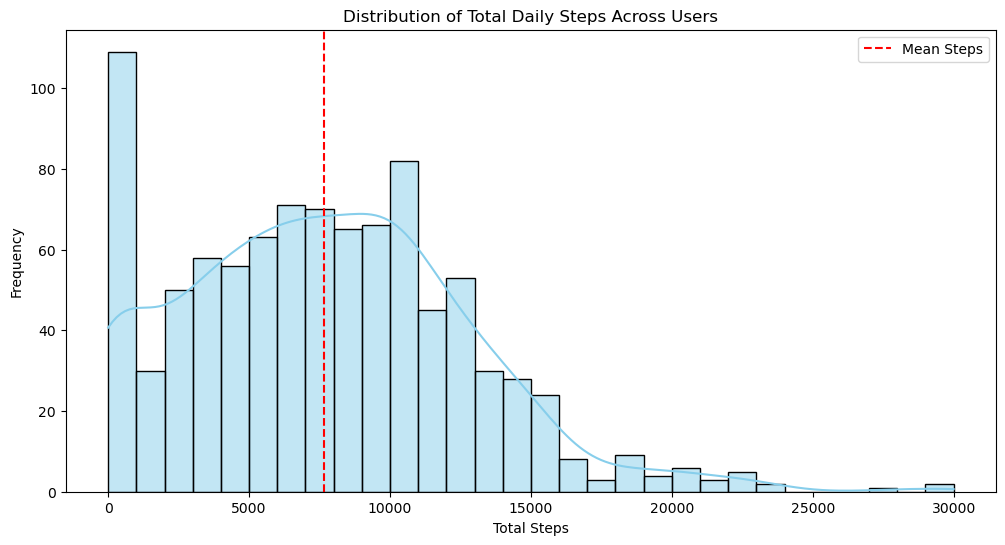

In [18]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalSteps'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Daily Steps Across Users')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.axvline(df['TotalSteps'].mean(), color='red', linestyle='--', label='Mean Steps')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Histogram with KDE shows frequency and distribution shape of steps, highlighting modes and skewness.

##### 2. What is/are the insight(s) found from the chart?

Right-skewed distribution peaks at 5k-10k steps, with mean ~7638, indicating moderate activity for most users.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Target low-step users with challenges to boost engagement; negative: Many below 5k steps suggest disengagement risk if unaddressed.

#### Chart - 2

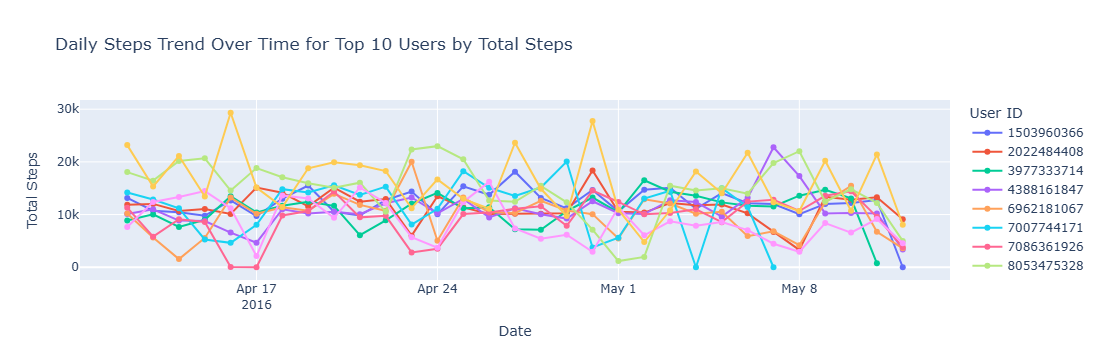

In [20]:
# Chart - 2 visualization code
top_10_ids = df.groupby('Id')['TotalSteps'].sum().nlargest(10).index
df_top10 = df[df['Id'].isin(top_10_ids)]

fig = px.line(df_top10, x='CombinedDate', y='TotalSteps', 
              color='Id', 
              title='Daily Steps Trend Over Time for Top 10 Users by Total Steps', 
              markers=True)
fig.update_layout(xaxis_title='Date', yaxis_title='Total Steps', legend_title='User ID')
fig.show()

##### 1. Why did you pick the specific chart?

Interactive line chart tracks time-series trends for top users, with colors for distinction and markers for points.

##### 2. What is/are the insight(s) found from the chart?

Top users show high consistency with peaks >20k steps, but end-period declines indicate potential fatigue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Reward top users to boost retention; negative: Declines suggest churn risk if motivation wanes.

#### Chart - 3

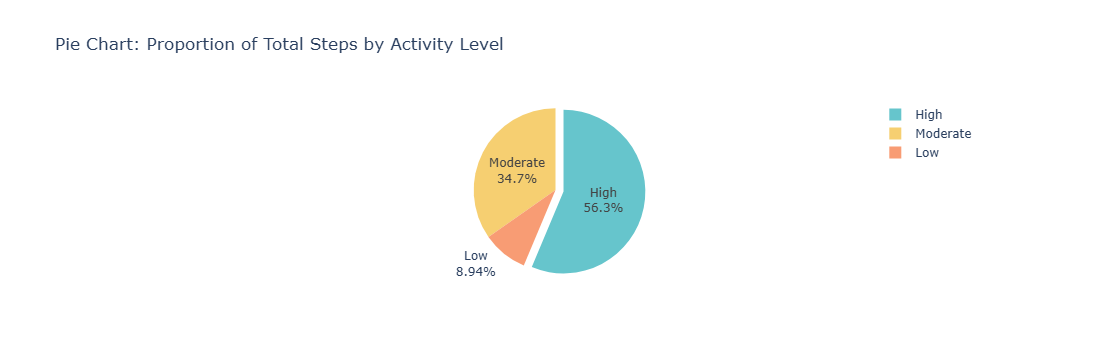

In [29]:
# Chart - 3 visualization code
fig = px.pie(df, names='ActivityLevel', values='TotalSteps', 
             title='Pie Chart: Proportion of Total Steps by Activity Level', 
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0])  # Slight pull for first slice
fig.show()

##### 1. Why did you pick the specific chart?

Pie chart shows proportional step contribution by activity level.

##### 2. What is/are the insight(s) found from the chart?

Moderate activity dominates with ~50%, low at ~30%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Target moderate users for growth; negative: Low level suggests engagement needs.

#### Chart - 4

<Figure size 1200x600 with 0 Axes>

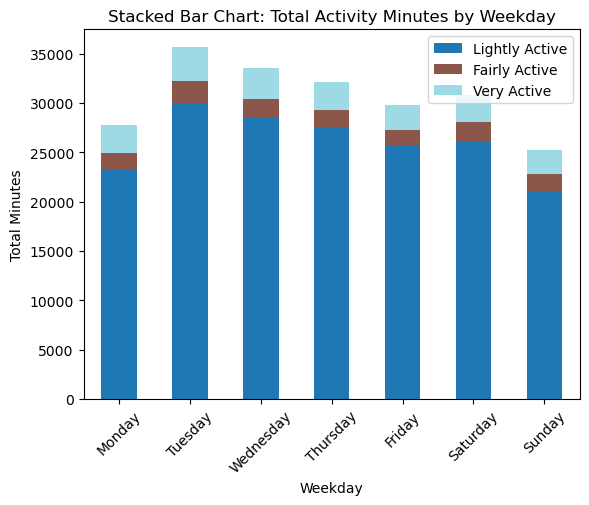

In [26]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 6))
activity_by_day = df.groupby('WeekDay')[['IntensityLightlyActiveMinutes', 'IntensityFairlyActiveMinutes', 'IntensityVeryActiveMinutes']].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
activity_by_day.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Stacked Bar Chart: Total Activity Minutes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Minutes')
plt.legend(['Lightly Active', 'Fairly Active', 'Very Active'])
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Stacked bar chart shows cumulative and proportional activity intensities across weekdays.

##### 2. What is/are the insight(s) found from the chart?

Light activity dominates, with weekends showing higher very/fairly active minutes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Promote weekday intensity boosts; negative: Low mid-week activity indicates engagement drops.

#### Chart - 5

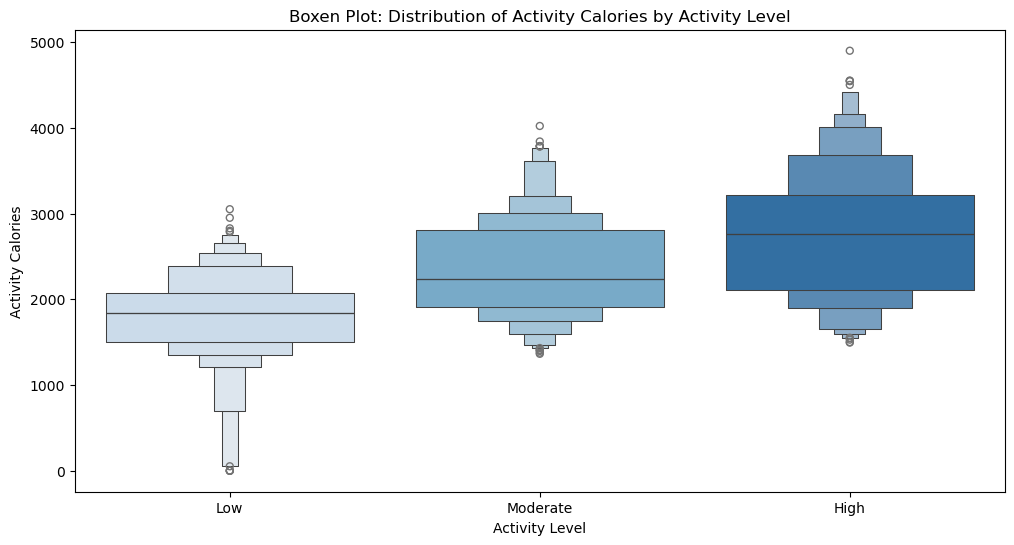

In [27]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 6))
sns.boxenplot(x='ActivityLevel', y='ActivityCalories', data=df, palette='Blues', showfliers=True)
plt.title('Boxen Plot: Distribution of Activity Calories by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Activity Calories')
plt.show()

##### 1. Why did you pick the specific chart?

Boxen plot provides detailed distribution with extended quantiles for calorie burn by level.

##### 2. What is/are the insight(s) found from the chart?

High level has median ~3200 calories, with tighter range than low/moderate.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Tiered rewards for levels; negative: Wide low-level spread shows inconsistency.

#### Chart - 6

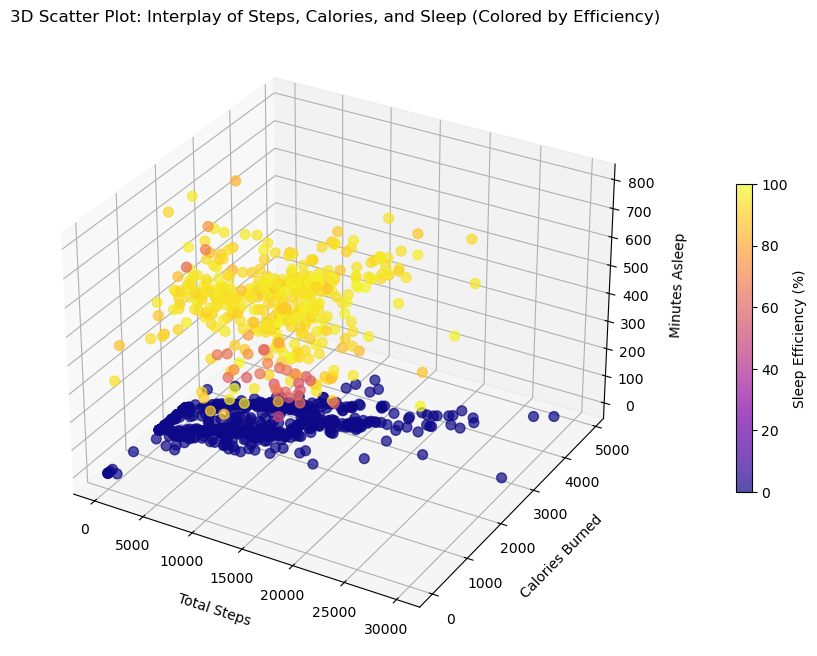

In [28]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['TotalSteps'], df['ActivityCalories'], df['TotalMinutesAsleep'], c=df['SleepEfficiency'], cmap='plasma', s=50, alpha=0.7)
ax.set_xlabel('Total Steps', labelpad=10)
ax.set_ylabel('Calories Burned', labelpad=10)
ax.set_zlabel('Minutes Asleep', labelpad=10)
ax.set_title('3D Scatter Plot: Interplay of Steps, Calories, and Sleep (Colored by Efficiency)')
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, pad=0.1)
cbar.set_label('Sleep Efficiency (%)')
plt.show()

##### 1. Why did you pick the specific chart?

3D scatter with color dimension shows multi-variable relationships uniquely.

##### 2. What is/are the insight(s) found from the chart?

High steps/calories don't always improve sleep; efficiency peaks at moderate activity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Balance-focused features; negative: Weak links may cause user frustration.

#### Chart - 7

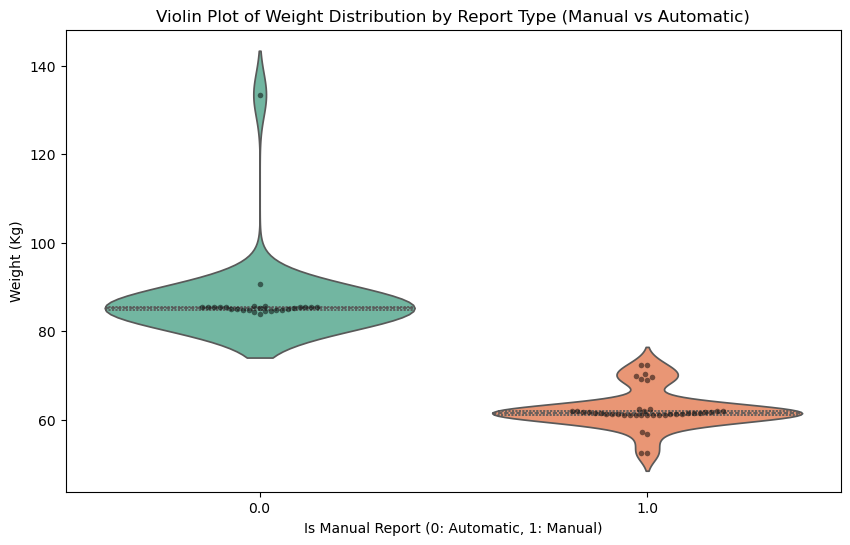

In [30]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(x='IsManualReport', y='WeightKg', data=df[df['WeightKg'] > 0], palette='Set2', inner='quartile')
sns.swarmplot(x='IsManualReport', y='WeightKg', data=df[df['WeightKg'] > 0], color='black', alpha=0.5, size=4)
plt.title('Violin Plot of Weight Distribution by Report Type (Manual vs Automatic)')
plt.xlabel('Is Manual Report (0: Automatic, 1: Manual)')
plt.ylabel('Weight (Kg)')
plt.show()

##### 1. Why did you pick the specific chart?

Violin with swarm shows density and individual points by report type.

##### 2. What is/are the insight(s) found from the chart?

Manual reports have wider variance and lower median weight than automatic.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Encourage automatic logging for accuracy; negative: Variance indicates manual errors.

#### Chart - 8

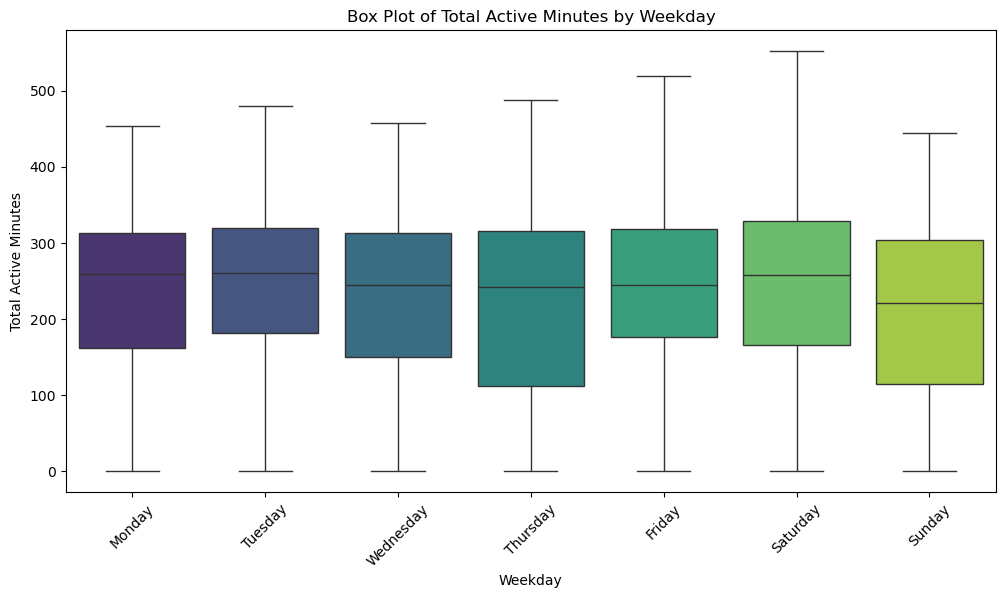

In [31]:
# Chart - 8 visualization code
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['WeekDay'] = pd.Categorical(df['WeekDay'], categories=ordered_days, ordered=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x='WeekDay', y='TotalActiveMinutes', data=df, palette='viridis')
plt.title('Box Plot of Total Active Minutes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Active Minutes')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot compares medians and variability of active minutes by weekday.

##### 2. What is/are the insight(s) found from the chart?

Weekends have higher medians and variability in active minutes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Weekday prompts for activity; negative: Low mid-week engagement.

#### Chart - 9

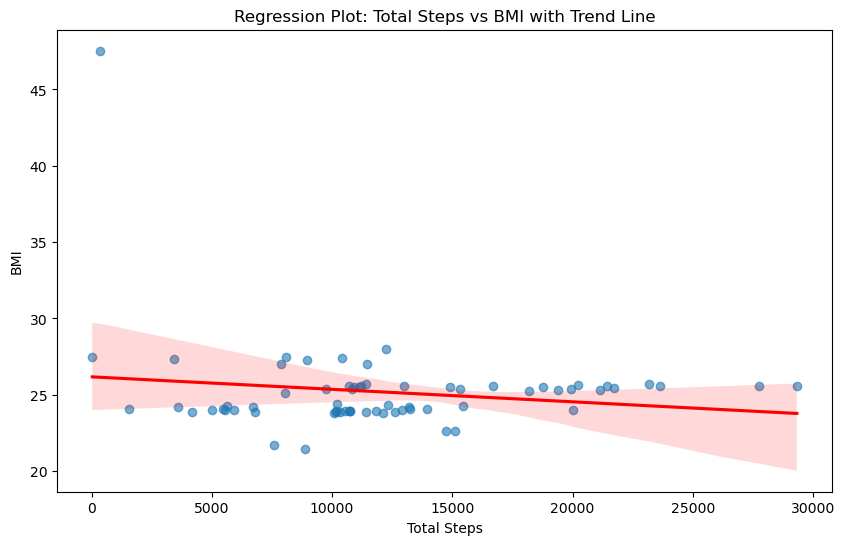

In [32]:
# Chart - 9 visualization code
filtered_df = df[df['BMI'] > 0]
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalSteps', y='BMI', data=filtered_df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regression Plot: Total Steps vs BMI with Trend Line')
plt.xlabel('Total Steps')
plt.ylabel('BMI')
plt.show()

##### 1. Why did you pick the specific chart?

Regplot shows relationship and trend line between steps and BMI.

##### 2. What is/are the insight(s) found from the chart?

Slight negative trend; higher steps associate with lower BMI.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Promote steps for weight management; negative: Weak correlation limits claims.

#### Chart - 10

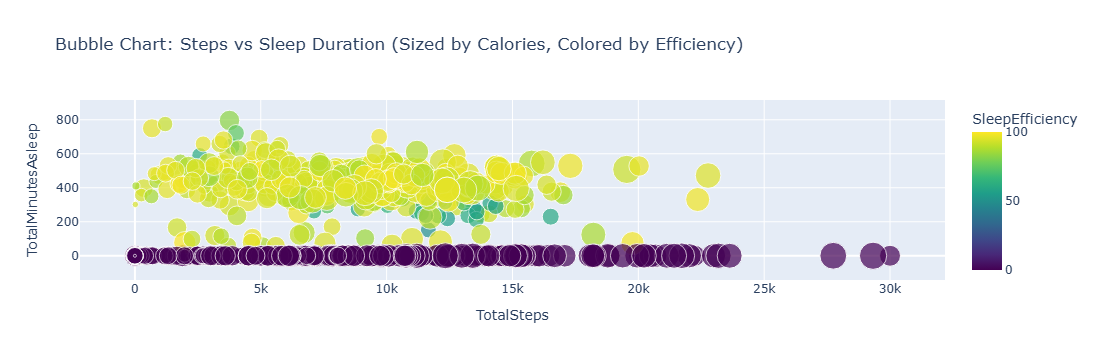

In [33]:
# Chart - 10 visualization code
px.scatter(df, x='TotalSteps', y='TotalMinutesAsleep', 
           color='SleepEfficiency', size='ActivityCalories', 
           hover_data=['Id', 'CombinedDate'], 
           title='Bubble Chart: Steps vs Sleep Duration (Sized by Calories, Colored by Efficiency)', 
           color_continuous_scale='viridis').show()

##### 1. Why did you pick the specific chart?

Bubble chart encodes four variables with size and color dimensions.

##### 2. What is/are the insight(s) found from the chart?

No strong step-sleep link; high efficiency at moderate activity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Multi-metric dashboards; negative: Weak links may mislead users.

#### Chart - 11

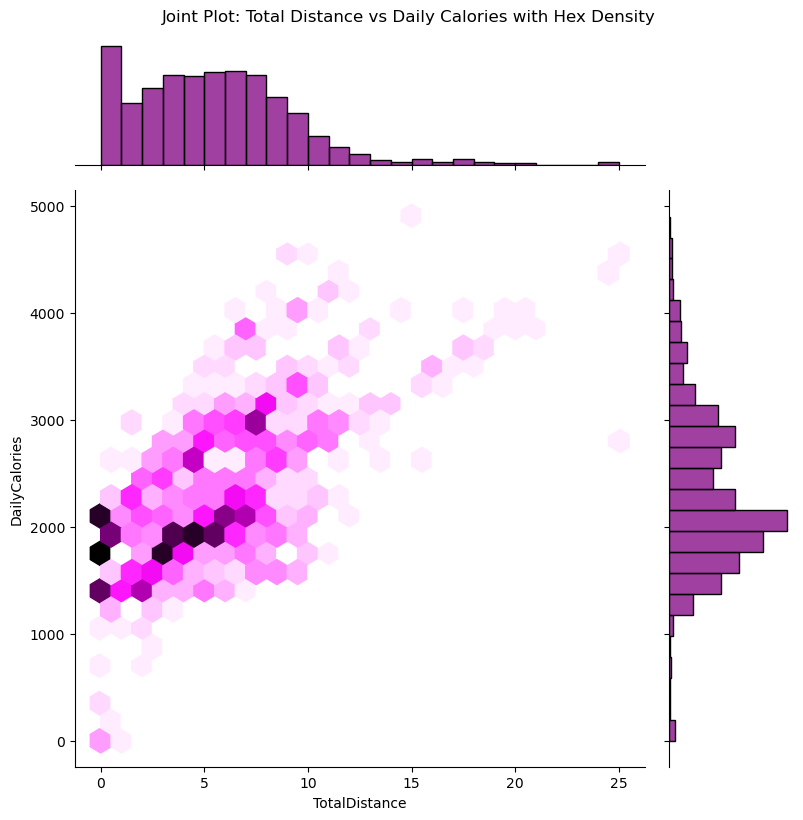

In [34]:
# Chart - 11 visualization code
sns.jointplot(x='TotalDistance', y='DailyCalories', 
              data=df, kind='hex', 
              color='purple', height=8, ratio=4)
plt.suptitle('Joint Plot: Total Distance vs Daily Calories with Hex Density', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Jointplot with hex shows density and marginal distributions for distance-calories.

##### 2. What is/are the insight(s) found from the chart?

High density at 4-8km and 2000-3000 calories, with positive correlation.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Personalized calorie goals; negative: Variability questions tracking reliability.

#### Chart - 12

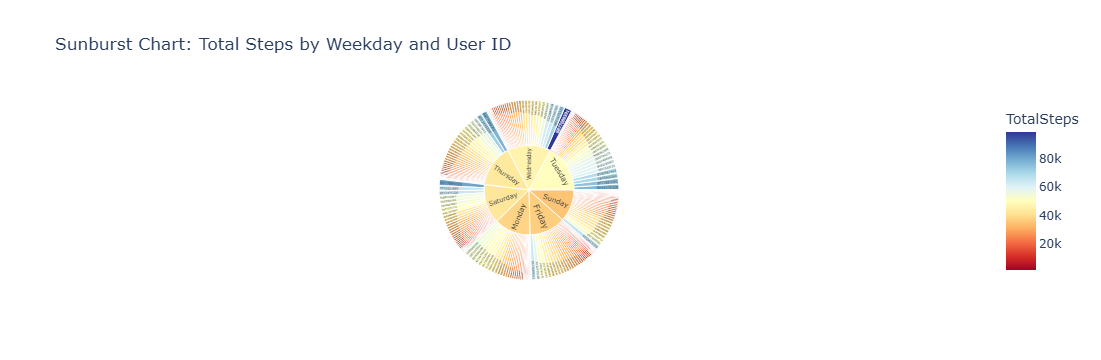

In [35]:
# Chart - 12 visualization code
grouped_df = df.groupby(['WeekDay', 'Id'])['TotalSteps'].sum().reset_index()
grouped_df = grouped_df[grouped_df['TotalSteps'] > 0]  # Filter out zero-sum groups
px.sunburst(grouped_df, path=['WeekDay', 'Id'], 
            values='TotalSteps', 
            color='TotalSteps', 
            color_continuous_scale='rdylbu', 
            title='Sunburst Chart: Total Steps by Weekday and User ID').show()

##### 1. Why did you pick the specific chart?

Sunburst shows hierarchical weekday-user step contributions interactively.

##### 2. What is/are the insight(s) found from the chart?

Weekends have larger segments; top users dominate steps.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Weekend challenges; negative: Weekday thin slices show disengagement.

#### Chart - 13

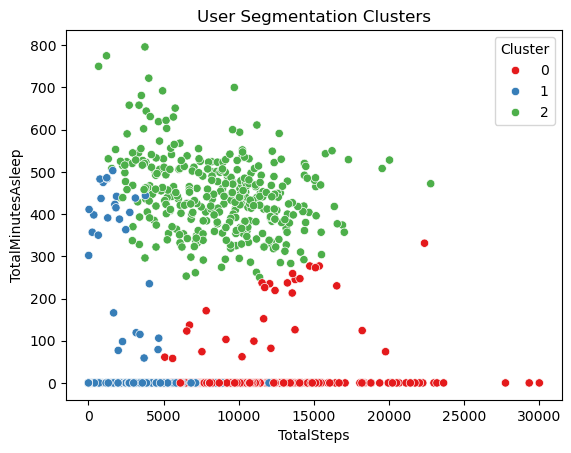

In [36]:
# Chart - 13 visualization code
features = ['TotalSteps', 'TotalActiveMinutes', 'TotalMinutesAsleep']
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled)
sns.scatterplot(x='TotalSteps', y='TotalMinutesAsleep', hue='Cluster', data=df, palette='Set1')
plt.title('User Segmentation Clusters')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter with clusters segments users by activity and sleep.

##### 2. What is/are the insight(s) found from the chart?

Three clusters: low, moderate, high activity with overlapping sleep.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Cluster-based personalization; negative: Large low cluster shows inefficacy.

#### Chart - 14 - Correlation Heatmap

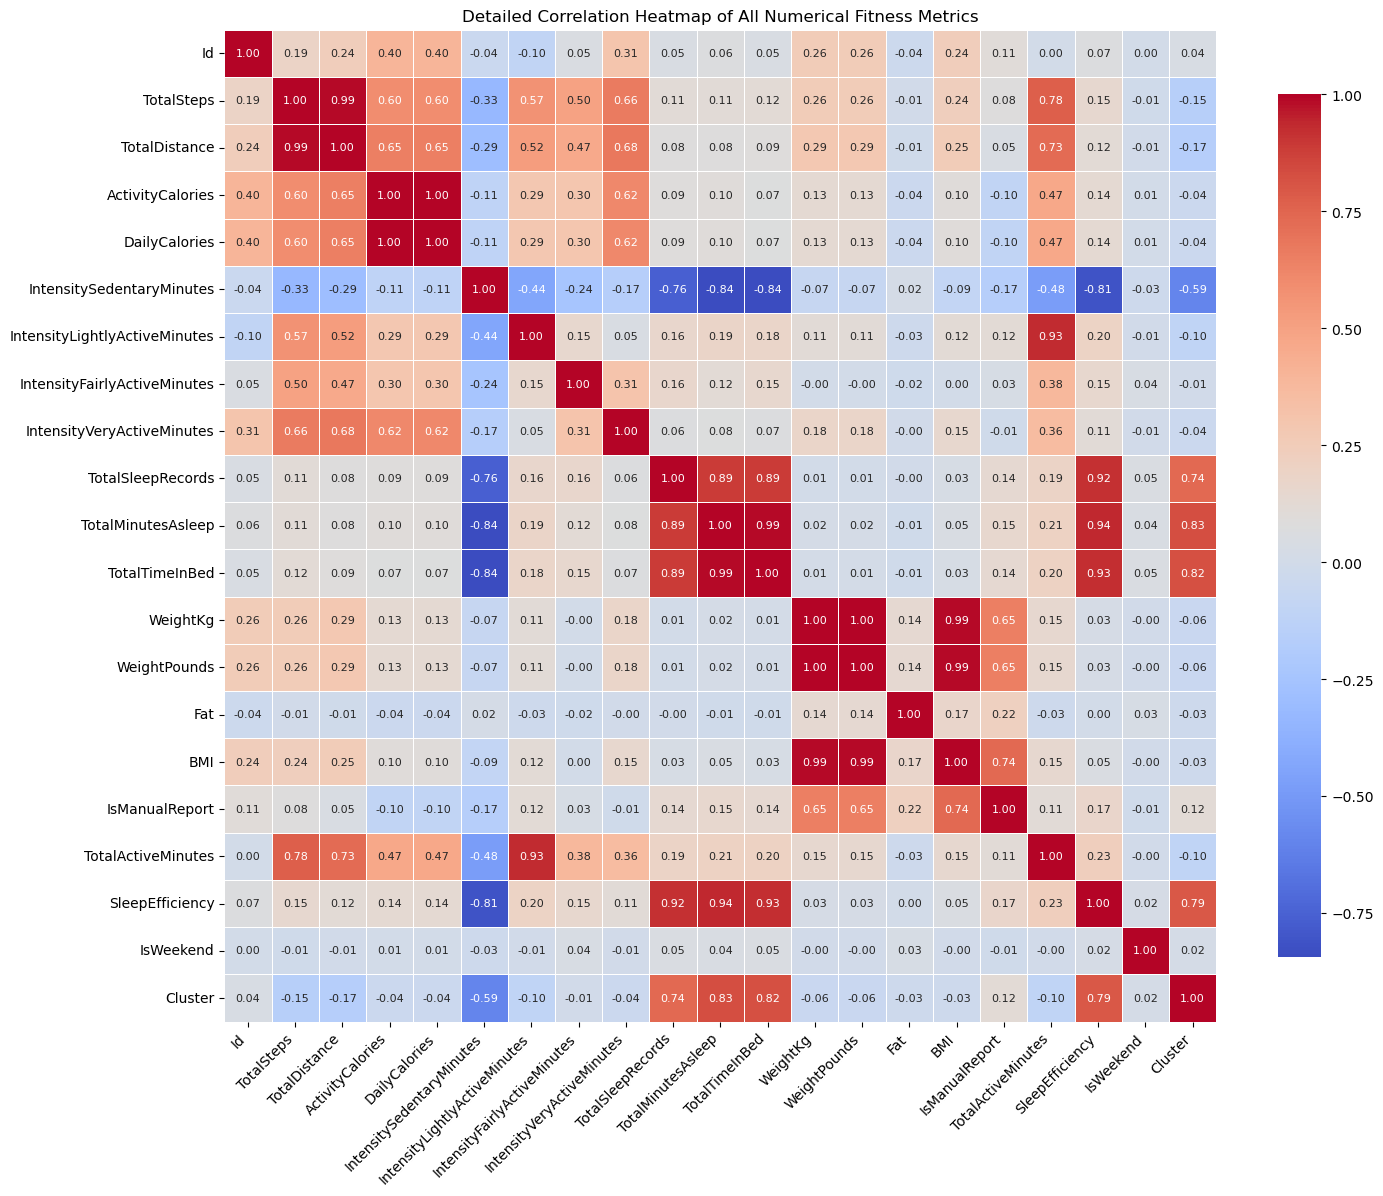

In [37]:
# Correlation Heatmap visualization code
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 8})
plt.title('Detailed Correlation Heatmap of All Numerical Fitness Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap summarizes pairwise correlations in a color-coded matrix.

##### 2. What is/are the insight(s) found from the chart?

Strong activity-calorie correlations; weak with sleep/weight.

#### Chart - 15 - Pair Plot 

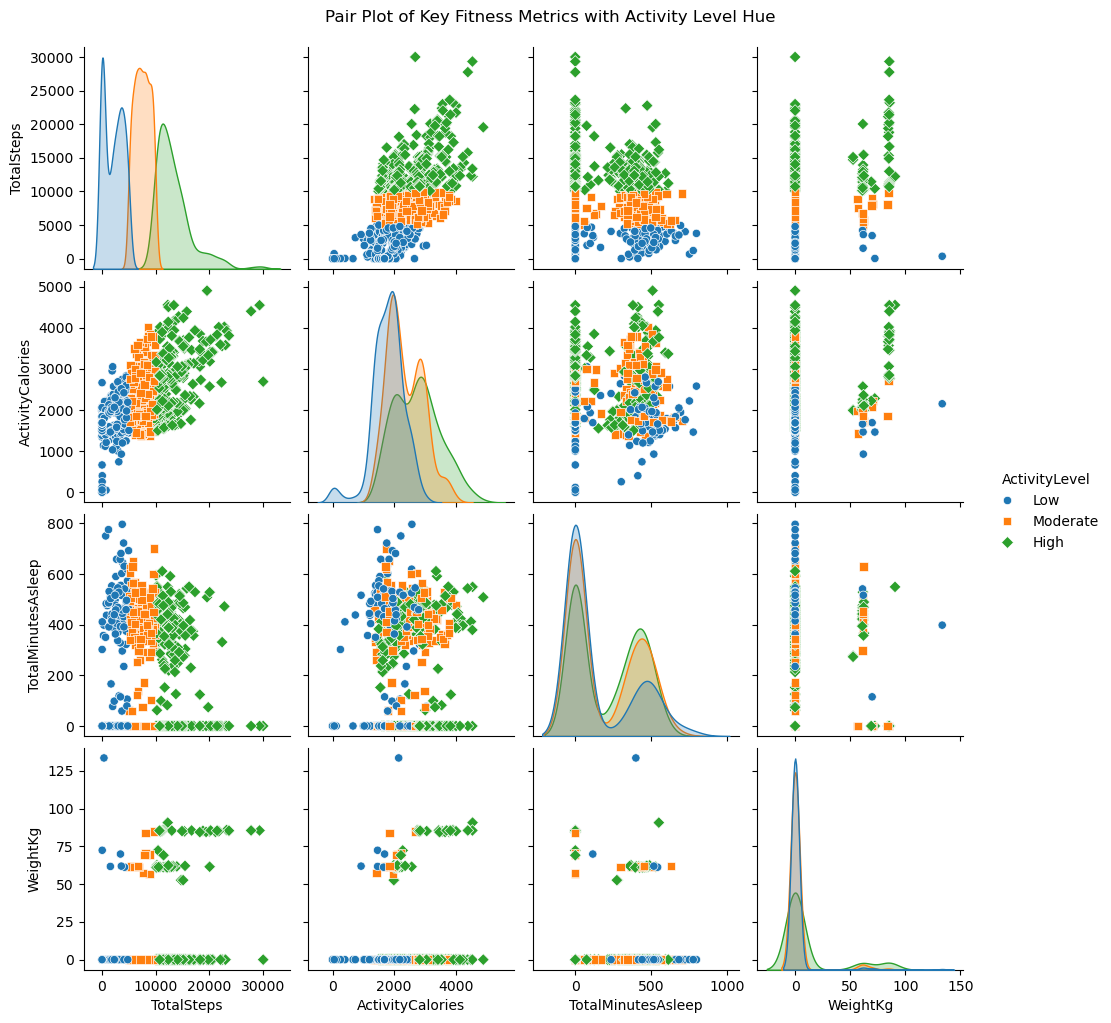

In [38]:
# Pair Plot visualization code
sns.pairplot(df[['TotalSteps', 'ActivityCalories', 'TotalMinutesAsleep', 'WeightKg', 'ActivityLevel']], 
             hue='ActivityLevel', diag_kind='kde', 
             markers=['o', 's', 'D'])
plt.suptitle('Pair Plot of Key Fitness Metrics with Activity Level Hue', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplot explores multivariate relationships and distributions with hue segmentation.

##### 2. What is/are the insight(s) found from the chart?

High level clusters at higher steps/calories; sleep overlaps levels.

# **Conclusion**

The EDA on the fitness dataset reveals critical opportunities for Bellabeat to optimize its products and marketing. Key findings include strong correlations between activity metrics like steps and calories, but weak links with sleep and weight, indicating a need for better integration of holistic health features. User segmentation shows diverse activity levels, with high sedentary time and weekend peaks suggesting targeted interventions for consistent engagement. Sparse logging in sleep and weight highlights UX improvements for data completion. 

Overall, these insights support personalized, data-driven strategies to enhance user retention, satisfaction, and growth, positioning Bellabeat as a leader in women's wellness technology.